# **Preprocessing and Data Exploration**
Aqui vou explorar as características das série temporal
- Plotar gráficos de box-plot, histogramas e de linhas por anos
- Analisar 
  - distribuição
  - sazonalidade
  - tendência
  - auto-correlação
- Teste de estacionariedade

## **Prepare Environment**

<br/>

### Imports

In [5]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Metrics
import statistics

# Plotting
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

import matplotlib.pyplot as plt
from matplotlib import pyplot



# statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.api as sm

# Other
from IPython.display import Image
import warnings
import pprint
import datetime
import os

<br/>

### Prepare Principal Directory

In [6]:
def path_to_work(end_directory: str='notebooks'):
    curr_dir = os.path.dirname(os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return f'Change directory to: {curr_dir}'
    
    return f'Current working directory: {curr_dir}'

In [7]:
path_to_work('notebooks')

'Change directory to: /home/campos/projects/tcc-ufsc-grad/notebooks'

<br/>

### Set Config

In [8]:
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500, 
    'figure.autolayout': True, 
    'figure.figsize': [17, 12], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 10, 
    'lines.linewidth': 1.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 15,
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15}

sns.set(context='notebook',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True, 
        rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

In [9]:
plt.style.use('seaborn')  # fivethirtyeight
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

---

## **Data Understanding**
### Collect Initial Data
O dataset para ser explorado foi obtido através do script `src/download_trade_mini-indice.mq5`

### File Descriptions
`vale3_2021-2020.csv` - dataset

<br/>

### Load Data

In [17]:
%%time

df_vale3 = pd.read_csv('data/raw/vale3_2010-2020.csv',
                              encoding='utf8',
                              delimiter=',',
                              verbose=True)

Tokenization took: 1.41 ms
Type conversion took: 2.85 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 6.6 ms, sys: 4.91 ms, total: 11.5 ms
Wall time: 9.88 ms


In [19]:
df_vale3.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 19, 2020",55.17,56.33,56.60,54.71,37.86M,-1.78%
1,"Jun 18, 2020",56.17,56.30,56.54,55.61,25.69M,-0.05%
2,"Jun 17, 2020",56.20,55.49,56.44,55.15,27.57M,1.46%
3,"Jun 16, 2020",55.39,55.49,55.50,54.22,29.17M,2.80%
4,"Jun 15, 2020",53.88,52.50,54.43,52.13,27.32M,0.90%


<br/>

### **Describe Data**

In [21]:
df_vale3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2495 non-null   object 
 1   Price     2495 non-null   float64
 2   Open      2495 non-null   float64
 3   High      2495 non-null   float64
 4   Low       2495 non-null   float64
 5   Vol.      2495 non-null   object 
 6   Change %  2495 non-null   object 
dtypes: float64(4), object(3)
memory usage: 136.6+ KB


In [22]:
print("Dataframe:\n{} rows\n{} columns".format(df_vale3.shape[0],
                                               df_vale3.shape[1]))

Dataframe:
2495 rows
7 columns


In [13]:
list_columns = (df_vale3.columns).tolist()

print("-"*25, "List Columns", "-"*25, end='\n')
display(list_columns)

------------------------- List Columns -------------------------


['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

In [14]:
df_vale3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2495 non-null   object 
 1   Price     2495 non-null   float64
 2   Open      2495 non-null   float64
 3   High      2495 non-null   float64
 4   Low       2495 non-null   float64
 5   Vol.      2495 non-null   object 
 6   Change %  2495 non-null   object 
dtypes: float64(4), object(3)
memory usage: 136.6+ KB


**NOTES**
<br/>

**1. Colunas:**
- Date (eixo x): data dos dados
- Price (eixo y): é o preço de fechamento. O que será previsto
- Open: preço de abertura
- High: preço máximo atingido
- Low: preço mínimo atingido
- Vol.: volume de ações negociadas
- Change %: porcentagem de alteração em relação ao dia anterior

<br/>

**2. Contexto:**
- Mercado de ações
- VALE3

<br/>

### **Explore Data**

In [16]:
def show_measures_location(df: 'dataframe', type_descr: 'list') -> None:
    """
    Function get measures localization + total col + % type columns 
    Handler when type data not exists
    
    Args:
    type_descr
        np.number, np.object  -> return summary statistic with all columns
        np.number             -> return summary statistic numerical columns 
        np.object             -> return summary statistic object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n\n')    
    else:
        list_col = col.tolist()
        percentage = (len(list_col) / df.shape[1]) * 100
        
        print("-"*25, "MEASURES OF LOCALIZATION", "-"*25, end='\n\n')
        print(f"TOTAL columns {type_descr}: {len(list_col)}")
        print("PERCENTAGE {} in dataframe: {:3.4} %".format(type_descr, percentage))
        
        return df.describe(include=type_descr)

In [13]:
show_measures_location(df=df_vale3,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 7
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,Date,Price,Open,High,Low,Vol.,Change %
count,2495,2495.000000,2495.000000,2495.000000,2495.000000,2495,2495
unique,2495,nan,nan,nan,nan,1339,927
top,"Apr 25, 2018",nan,nan,nan,nan,3.99M,0.00%
freq,1,nan,nan,nan,nan,9,20
mean,NaN,35.801788,35.828188,36.316914,35.315695,NaN,NaN
std,NaN,12.277343,12.279942,12.344400,12.184122,NaN,NaN
min,NaN,8.600000,8.750000,9.060000,8.600000,NaN,NaN
25%,NaN,26.880000,26.930000,27.340000,26.605000,NaN,NaN
50%,NaN,36.880000,36.870000,37.420000,36.300000,NaN,NaN
75%,NaN,46.355000,46.330000,46.830000,45.730000,NaN,NaN


In [15]:
df_vale3.nunique()

Date        2495
Price       1845
Open        1816
High        1852
Low         1845
Vol.        1339
Change %     927
dtype: int64

In [14]:
df_vale3.mode(dropna=False, numeric_only=True)

,Price,Open,High,Low
0,27.430000,51.000000,38.150000,17.650000
1,nan,nan,44.330000,nan
2,nan,nan,52.090000,nan
3,nan,nan,53.120000,nan


In [15]:
df_vale3.median()

Price   36.880000
Open    36.870000
High    37.420000
Low     36.300000
dtype: float64

In [16]:
df_vale3.isnull().any()

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [17]:
df_vale3.duplicated().any()

False

---

## **Data Preparation: Cleaning**
A análise da ST é univariada, ou seja, somente a coluna `price` em relação ao tempo que será prevista. Isto vai garantir uma melhor comparação entre os modelos estatísticos, de aprendizado de máquina e aprendizado profundo.

#### Todas as colunas em letras minúsculas

In [20]:
df_vale3.columns =  map(str.lower, df_vale3.columns)
print(df_vale3.columns)

Index(['date', 'price'], dtype='object')


#### lista de colunas

In [21]:
list_columns = []
list_columns = df_vale3.columns

list_columns

Index(['date', 'price'], dtype='object')

### Formatação das Colunas

#### Data
- Transforma o formato da data (Jun 19, 2020) em (2020-06-19)
- Transforma a o tipo da coluna `date` para `datetime64`

In [22]:
df_vale3['date'] = pd.to_datetime(df_vale3['date'])
df_vale3 = df_vale3.iloc[::-1]

In [23]:
df_vale3.head(10)

,date,price
2494,2010-05-20,39.790000
2493,2010-05-21,42.460000
2492,2010-05-24,42.020000
2491,2010-05-25,42.390000
2490,2010-05-26,42.170000
2489,2010-05-27,44.820000
2488,2010-05-28,44.420000
2487,2010-05-31,45.370000
2486,2010-06-01,44.390000
2485,2010-06-02,45.320000


In [24]:
df_vale3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 2494 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2495 non-null   datetime64[ns]
 1   price   2495 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.1 KB


<br/>

### Data como índice

In [25]:
df_vale3_date_index = df_vale3
df_vale3_date_index.index.names = ['date']
df_vale3_date_index.index = df_vale3['date']
df_vale3_date_index.index = pd.to_datetime(df_vale3.index)

print(df_vale3_date_index.index.freq)
print(df_vale3_date_index.index)

None
DatetimeIndex(['2010-05-20', '2010-05-21', '2010-05-24', '2010-05-25',
               '2010-05-26', '2010-05-27', '2010-05-28', '2010-05-31',
               '2010-06-01', '2010-06-02',
               ...
               '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-12', '2020-06-15', '2020-06-16', '2020-06-17',
               '2020-06-18', '2020-06-19'],
              dtype='datetime64[ns]', name='date', length=2495, freq=None)


In [26]:
df_vale3_date_index.head()

,date,price
date,,
2010-05-20,2010-05-20,39.790000
2010-05-21,2010-05-21,42.460000
2010-05-24,2010-05-24,42.020000
2010-05-25,2010-05-25,42.390000
2010-05-26,2010-05-26,42.170000


<br/>

### **Verify Data Quality**
- Check index
- Check for irrelevant values
- Check for outliers

<br/>

#### Check Index

In [27]:
df_vale3.index

RangeIndex(start=0, stop=2495, step=1)

<br/>

#### Check for irrelevant values

In [19]:
df_vale3.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)

<br/>

#### Check for outliers

In [27]:
def plot_box_plot(df: 'dataframe', data_set_name: str, xlim=None):
    """
    Creates a seaborn boxplot including all dependent
    
    Args:
    data_set_name: Name of title for the boxplot
    xlim: Set upper and lower x-limits
    
    Returns:
    Box plot with specified data_frame, title, and x-limits 
    """
    fig, ax = plt.subplots(figsize=(18, 10))

    if xlim is not None:
        plt.xlim(*xlim)
    
    plt.title(f"Horizontal Boxplot {data_set_name}")
        
    plt.ylabel('Dependent Variables')
    plt.xlabel('Measurement x')
    ax = sns.boxplot(data = df,
                    orient = 'h', 
                    palette = 'Set2',
                    notch = False, # box instead of notch shape 
                    sym = 'rs')  # red squares for outliers

    plt.show()

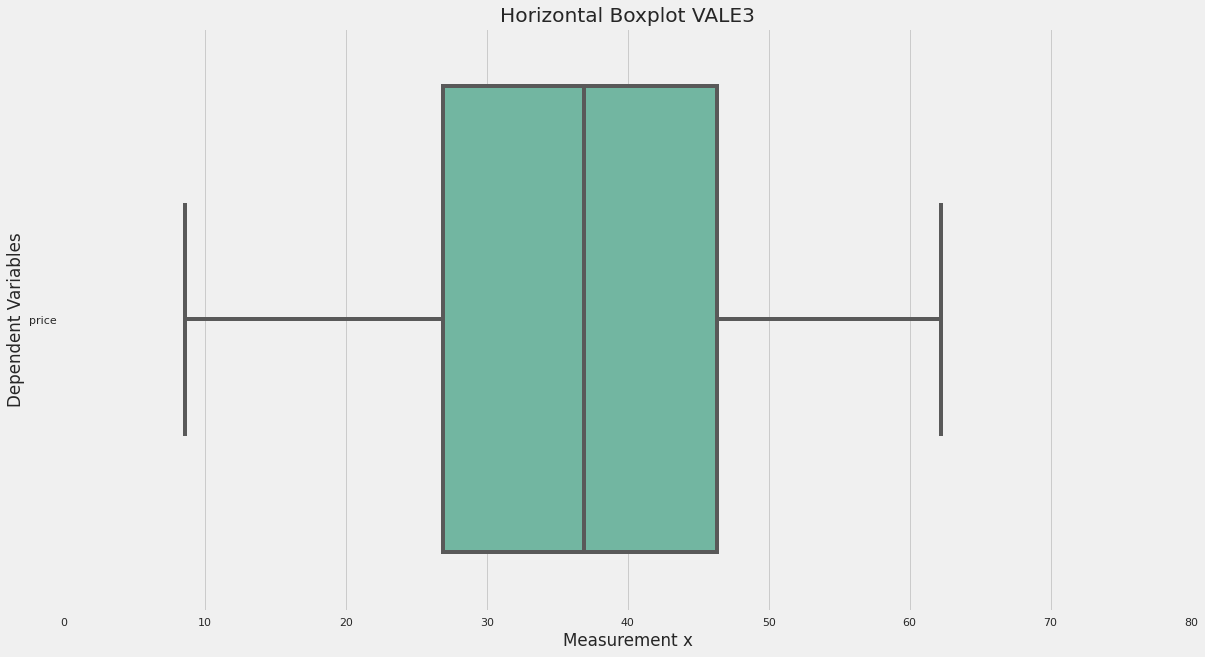

In [28]:
plot_box_plot(df_vale3, 
              'VALE3', 
              (0, 80))

---

## **Data Understanding: Statistics and Plot**
### **Data Explorate**
- Análise dos componentes da ST
- distribuição
- sazonalidade
- tendência
- ruídos

In [18]:
def save_image(img: 'matplotlib',
               name: str,
               path: str = 'reports/images/'):
    
    fig = img.get_figure()
    fig.savefig(f"reports/images/{name}.png")
    
    return f"Image {name} saved."

#### Distribuição

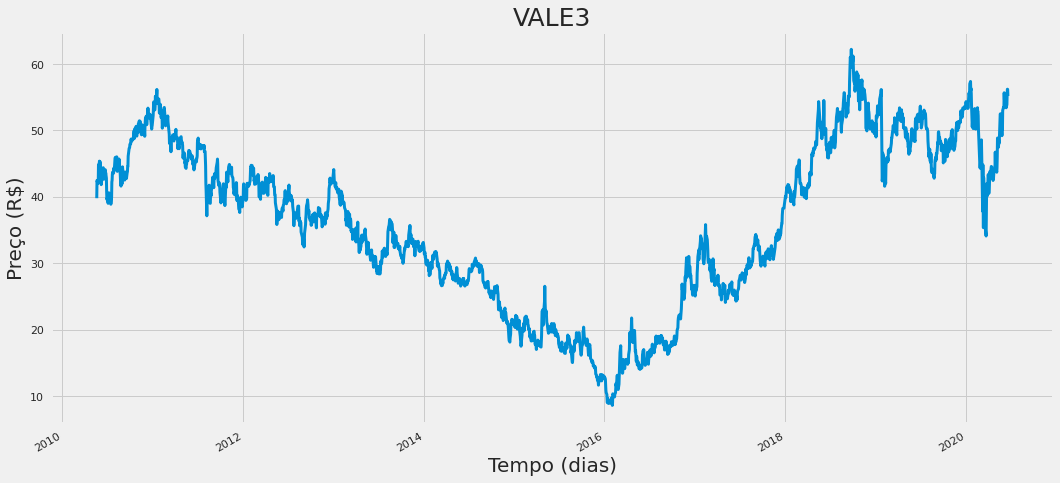

In [29]:
img_vale3_distr_line = df_vale3_date_index['price'].plot(linewidth=3)

plt.title(f'VALE3', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

In [30]:
save_image(img=img_vale3_distr_line, name='img_vale3_distr_line')

'Image img_vale3_distr_line saved.'

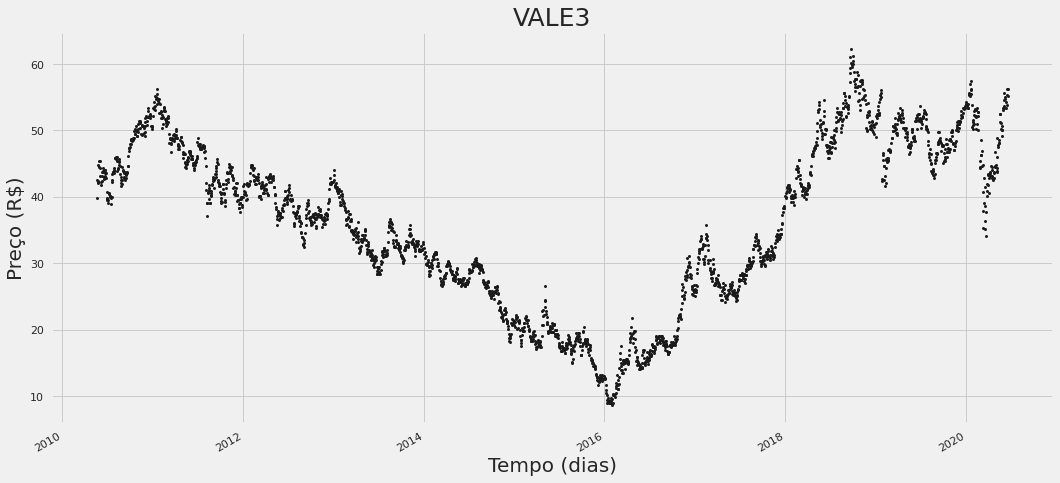

In [31]:
img_vale3_distr_scatter = df_vale3_date_index['price'].plot(style='k.')

plt.title(f'VALE3', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

In [32]:
save_image(img=img_vale3_distr_scatter, name='img_vale3_distr_scatter')

'Image img_vale3_distr_scatter saved.'

#### **NOTES**
- Houve uma grande tendência de baixa, començando após alcançar o topo e durou aproximadamente 500 dias.
- Depois da tendência de baixa alvançar o fundo houve reversão de começando um ciclo de alta.
- No momento aparenta estar em fase de consolidação.

<br/>

### **Decomposição da Série Temporal**
- O objetivo é decompor a ST
- A ST aparenta ter duas tendências sendo os dois casos uma tendência linear do que exponencial, então a decomposição será `additive`

In [33]:
decomposition_add = seasonal_decompose(df_vale3['price'],
                                   freq=30,
                                   model='multiplicative') 
trend = decomposition_add.trend 
seasonal = decomposition_add.seasonal 
residual = decomposition_add.resid 

<AxesSubplot:xlabel='date', ylabel='Resíduo'>

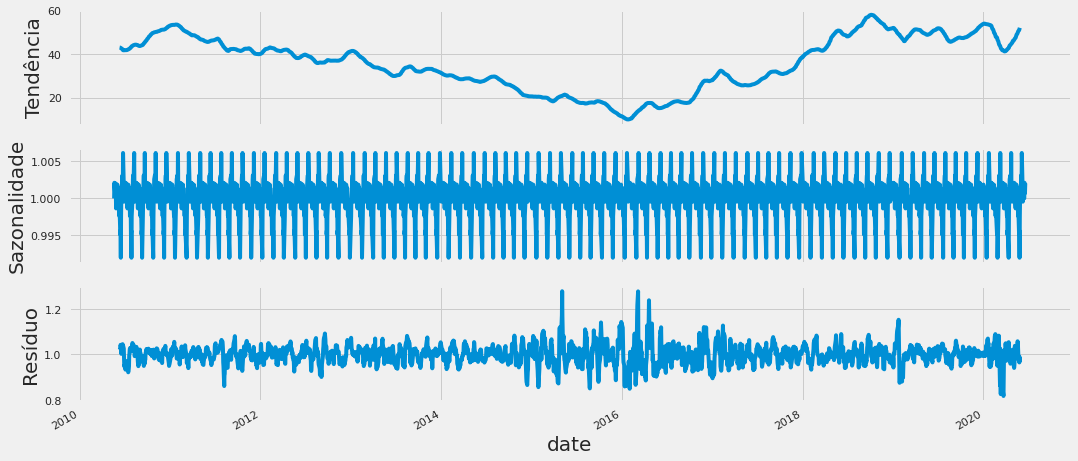

In [34]:
fig, axes = plt.subplots(ncols=1, nrows=3, sharex=True)

axes[0].set_ylabel('Tendência', fontsize=20)
axes[1].set_ylabel('Sazonalidade', fontsize=20)
axes[2].set_ylabel('Resíduo', fontsize=20)
axes[2].set_xlabel('Tempo dias', fontsize=20)

decomposition_add.trend.plot(ax=axes[0])
decomposition_add.seasonal.plot(ax=axes[1])
decomposition_add.resid.plot(ax=axes[2])

'Image img_df_vale3_without_trend saved.'

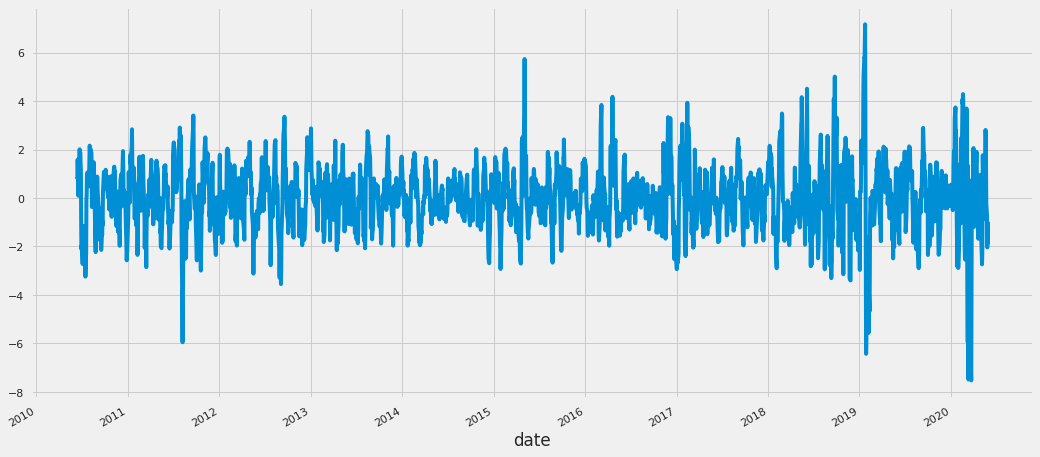

In [35]:
df_vale3_without_trend = df_vale3['price'] - trend
img_df_vale3_without_trend = df_vale3_without_trend.plot()
save_image(img=img_df_vale3_without_trend, name='img_df_vale3_without_trend')

'Image img_df_vale3_without_seasonal saved.'

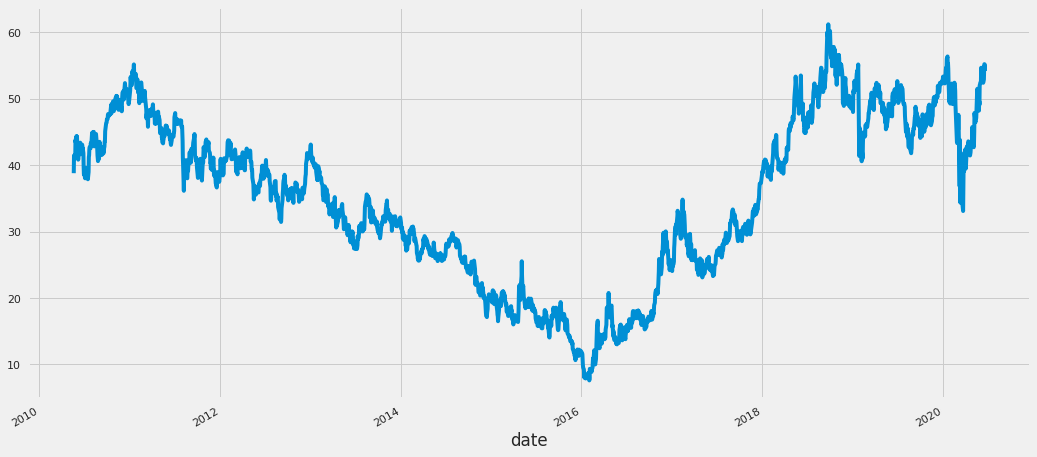

In [36]:
df_vale3_without_seasonal = df_vale3['price'] - seasonal
img_df_vale3_without_seasonal = df_vale3_without_seasonal.plot()
save_image(img=img_df_vale3_without_seasonal, name='img_df_vale3_without_seasonal')

'Image df_vale3_without_resid saved.'

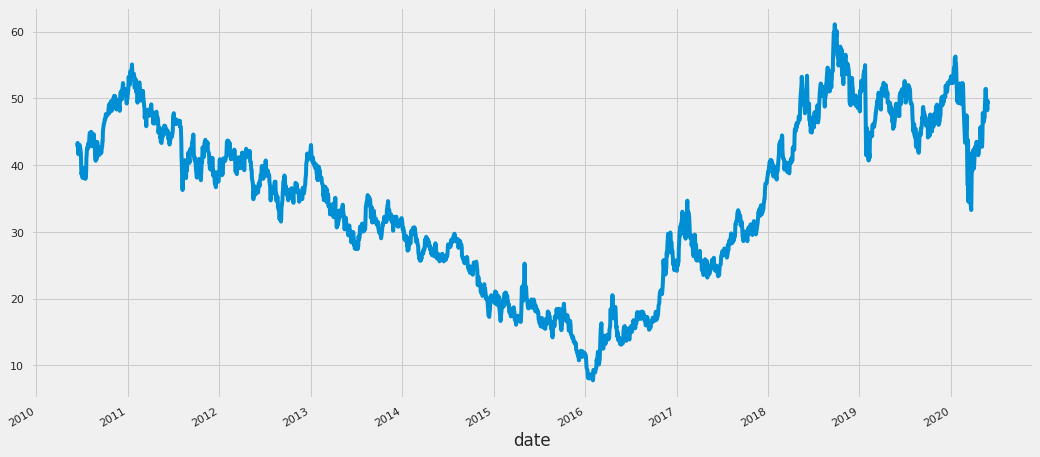

In [37]:
df_vale3_without_resid = df_vale3['price'] - residual
df_vale3_without_resid = df_vale3_without_resid.plot()
save_image(img=df_vale3_without_resid, name='df_vale3_without_resid')

NOTES:

A decomposição da ST demonstra:
 - Ocorreram 2 grandes tendências e nos últimos anos o preço não apresenta uma tendência evidente.
 - A sazonalidade ocorre de 30 em 30 dias.
 - O que se pode notar é que de 2018 em diante os resíduos aumentaram. Neste mesmo período a ST não apresentou uma tendência clara.

---

<br/>

### **Auto-correlation**
Modelos autoregressivos como ARIMA, supõem que as observações anteriores são úteis para prever o valor da próxima etapa de tempo.
<br/>
Quanto mais forte a correlação entre a variável de saída e uma variável defasada específica, mais peso o modelo de auto-regressão pode colocar nessa variável.

#### NOTES:
- A correlação é calculada entre a variável e ela mesma nas etapas de tempo anteriores, por isso o nome autocorrelação.
- Calcular a correlação também podem ajudar escolher as variáveis de atraso serão úteis em um modelo e quais não serão.
- Se as variáveis de atraso mostrarem baixa ou nenhuma correlação com a variável de saída, a série temporal pode não ser previsível.
- Usei Pearson

#### wiki

 análise de autocorrelação é uma ferramenta matemática para encontrar padrões repetitivos, como a presença de um sinal periódico obscurecido por ruído ou a identificação da frequência fundamental ausente em um sinal implícito por suas frequências harmônicas . É frequentemente usado no processamento de sinais para analisar funções ou séries de valores, como sinais no domínio do tempo .

In [38]:
df_vale3_date_index['price'].autocorr(lag=1)

0.9972513584845024

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Image img_df_vale3_autocorr_1 saved.'

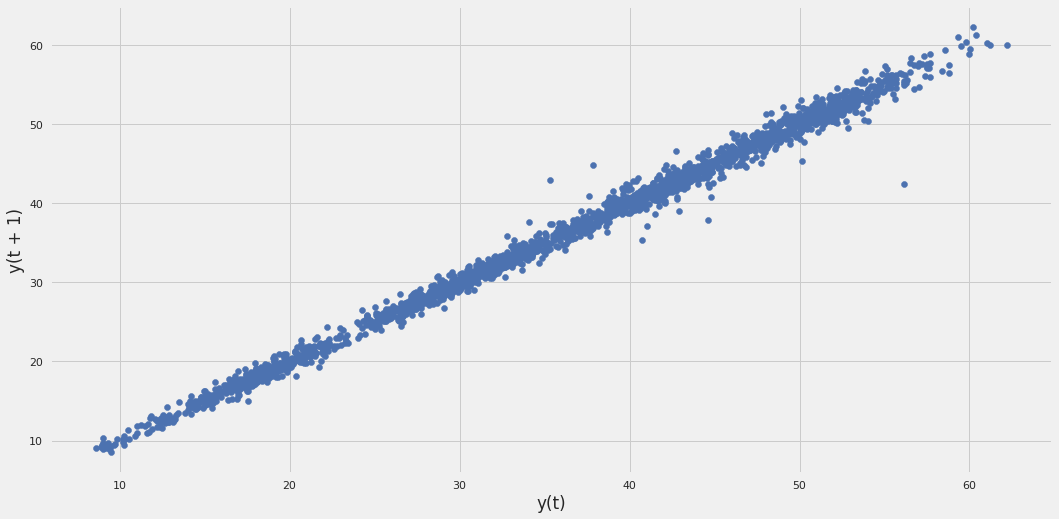

In [39]:
img_df_vale3_autocorr_1 = lag_plot(df_vale3_date_index['price'], lag=1)
save_image(img=img_df_vale3_autocorr_1, name='img_df_vale3_autocorr_1')

In [40]:
df_vale3_date_index['price'].autocorr(lag=30)

0.9459357661702158

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Image img_df_vale3_autocorr saved.'

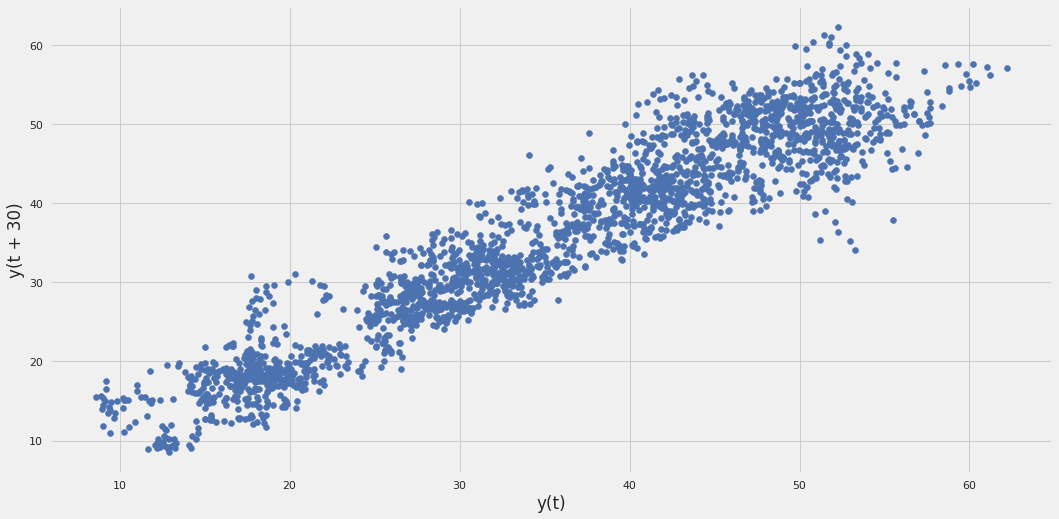

In [41]:
img_df_vale3_autocorr = lag_plot(df_vale3_date_index['price'], lag=30)
save_image(img=img_df_vale3_autocorr, name='img_df_vale3_autocorr')

In [42]:
df_vale3_date_index['price'].autocorr(lag=313)

0.5017662028027128

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Image img_df_vale3_autocorr_313 saved.'

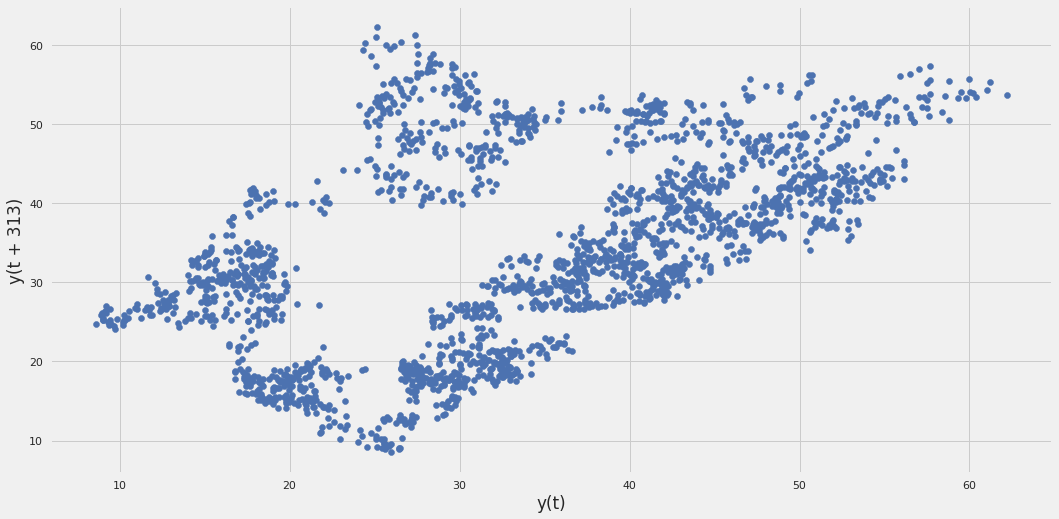

In [43]:
img_df_vale3_autocorr_313 = lag_plot(df_vale3_date_index['price'], lag=313)
save_image(img=img_df_vale3_autocorr_313, name='img_df_vale3_autocorr_313')

In [44]:
df_vale3_date_index['price'].autocorr(lag=314)

0.49925706901064987

Até 314 dias ainda possuem correlação.

#### Visualização da variável lag

In [45]:
df_vale3_original_lag_30 = pd.concat([df_vale3_date_index['price'],
                                     df_vale3_date_index['price'].shift(30)], axis=1)

In [46]:
df_vale3_original_lag_30.head(50)

,price,price
date,,
2010-05-20,39.790000,nan
2010-05-21,42.460000,nan
2010-05-24,42.020000,nan
2010-05-25,42.390000,nan
2010-05-26,42.170000,nan
2010-05-27,44.820000,nan
2010-05-28,44.420000,nan
2010-05-31,45.370000,nan
2010-06-01,44.390000,nan


Podemos ver um grande grupo de observações ao longo de uma linha diagonal, mostrando claramente uma relação ou alguma correlação.

'Image img_df_vale3_autocorr_time saved.'

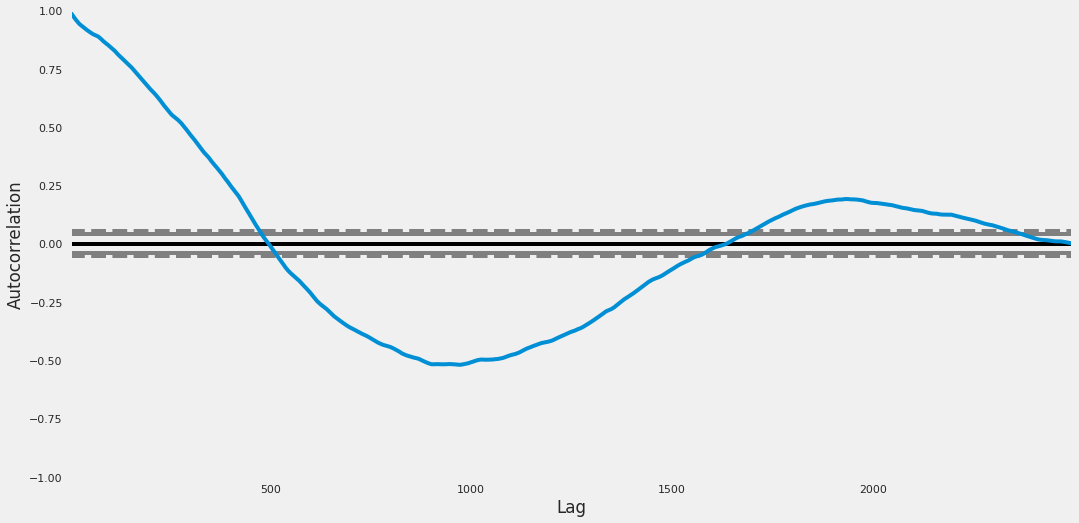

In [47]:
img_df_vale3_autocorr_time = autocorrelation_plot(df_vale3_date_index['price'])
save_image(img=img_df_vale3_autocorr_time, name='img_df_vale3_autocorr_time')

Os intervalos de confiança são de 95% e 99% sugerindo que os valores de correlação fora desse intervalo são muito provavelmente uma correlação e não um acaso estatístico.

<br/>

### **Stationarity**
É preciso garantir que os dados são estacionários. Significa que a série temporal possui um comportamento ao longo do tempo e que possui uma alta probabilidade de seguir este mesmo comportamento no futuro.

Visualmente a série não é estacionária. Para garantir o comportamento dessa série vou plotar as estatíticas de rolagem( ma, var) e fazer o teste de Dickey-Fuller.


Então neste teste avalio duas hipóteses:
- Hipótese nula (H0) : não é estacionária. Tem alguma estrutura dependente do tempo.
- Hipótese alternativa (H1) : é estacionária. Não tem estrutura dependente do tempo.

In [48]:
def test_stationarity(timeseries):
    
    # determing rolling statistics
    rolmean = timeseries.rolling(window=30, center=False).mean()
    rolstd  = timeseries.rolling(window=30, center=False).std()

    # plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    

    # perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag=None)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

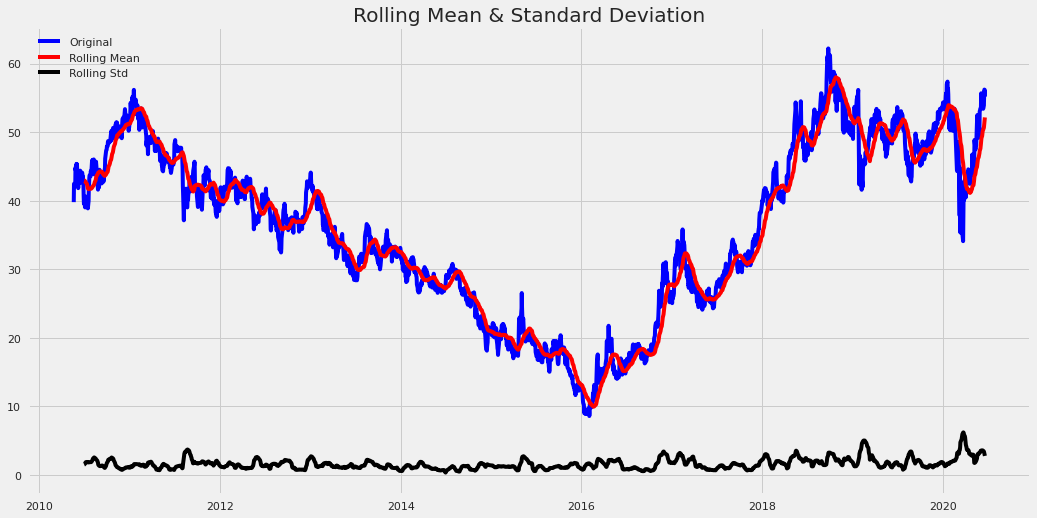

Results of Dickey-Fuller Test:
Test Statistic                  -0.929286
p-value                          0.778175
Lags Used                       27.000000
Number of Observations Used   2467.000000
Critical Value (1%)             -3.433003
Critical Value (5%)             -2.862712
Critical Value (10%)            -2.567394
dtype: float64


In [49]:
test_stationarity(df_vale3['price'])

<br/>

**NOTES**
<br/>
- Usado `autolag='AIC'` para a própia função determinar o lag, escolhendo o menor valor observado.
- **Test Statistic > Critical Value (1%)**, então a H0 é aceita, ou seja, não se tem estacionariedade na ST explorada
- Neste caso se faz necessário deixar a ST estacionária !

#### Estacionariedade por Decomposição

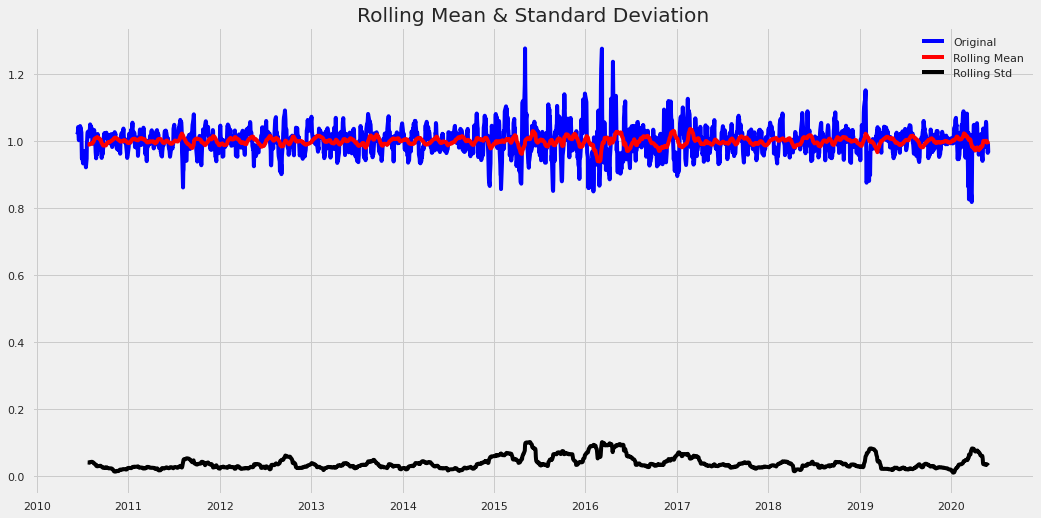

Results of Dickey-Fuller Test:
Test Statistic                 -12.432177
p-value                          0.000000
Lags Used                       27.000000
Number of Observations Used   2437.000000
Critical Value (1%)             -3.433036
Critical Value (5%)             -2.862727
Critical Value (10%)            -2.567402
dtype: float64


In [50]:
residual
residual.dropna(inplace=True)
test_stationarity(residual)

---

## **Data Preparation: Feature Engineering**

In [51]:
cols = ['data', 'preco', 'residuos', 'tendencia', 'sazonalidade']

In [52]:
df = pd.DataFrame(columns=cols)
df.head()

,data,preco,residuos,tendencia,sazonalidade


In [53]:
df['data'] = df_vale3['date']
df.head()

,data,preco,residuos,tendencia,sazonalidade
date,,,,,
2010-05-20,2010-05-20,NaN,NaN,NaN,NaN
2010-05-21,2010-05-21,NaN,NaN,NaN,NaN
2010-05-24,2010-05-24,NaN,NaN,NaN,NaN
2010-05-25,2010-05-25,NaN,NaN,NaN,NaN
2010-05-26,2010-05-26,NaN,NaN,NaN,NaN


In [54]:
df['preco'] = df_vale3['price']
df.head()

,data,preco,residuos,tendencia,sazonalidade
date,,,,,
2010-05-20,2010-05-20,39.790000,NaN,NaN,NaN
2010-05-21,2010-05-21,42.460000,NaN,NaN,NaN
2010-05-24,2010-05-24,42.020000,NaN,NaN,NaN
2010-05-25,2010-05-25,42.390000,NaN,NaN,NaN
2010-05-26,2010-05-26,42.170000,NaN,NaN,NaN


In [55]:
df['tendencia'] = trend.values
df.head(20)

,data,preco,residuos,tendencia,sazonalidade
date,,,,,
2010-05-20,2010-05-20,39.790000,NaN,nan,NaN
2010-05-21,2010-05-21,42.460000,NaN,nan,NaN
2010-05-24,2010-05-24,42.020000,NaN,nan,NaN
2010-05-25,2010-05-25,42.390000,NaN,nan,NaN
2010-05-26,2010-05-26,42.170000,NaN,nan,NaN
2010-05-27,2010-05-27,44.820000,NaN,nan,NaN
2010-05-28,2010-05-28,44.420000,NaN,nan,NaN
2010-05-31,2010-05-31,45.370000,NaN,nan,NaN
2010-06-01,2010-06-01,44.390000,NaN,nan,NaN


In [56]:
df['sazonalidade'] = seasonal.values
df.head(20)

,data,preco,residuos,tendencia,sazonalidade
date,,,,,
2010-05-20,2010-05-20,39.790000,NaN,nan,0.999916
2010-05-21,2010-05-21,42.460000,NaN,nan,1.002028
2010-05-24,2010-05-24,42.020000,NaN,nan,1.000593
2010-05-25,2010-05-25,42.390000,NaN,nan,1.000831
2010-05-26,2010-05-26,42.170000,NaN,nan,1.001943
2010-05-27,2010-05-27,44.820000,NaN,nan,1.000149
2010-05-28,2010-05-28,44.420000,NaN,nan,0.998563
2010-05-31,2010-05-31,45.370000,NaN,nan,1.000439
2010-06-01,2010-06-01,44.390000,NaN,nan,1.000935


In [57]:
residuos = residual.values

In [58]:
df = df[30:]

In [59]:
df['residuos'] = residuos
df.head()

,data,preco,residuos,tendencia,sazonalidade
date,,,,,
2010-07-02,2010-07-02,39.580000,1.019533,41.746333,0.999916
2010-07-05,2010-07-05,39.020000,1.025057,41.743000,1.002028
2010-07-06,2010-07-06,39.510000,1.041665,41.738667,1.000593
2010-07-07,2010-07-07,40.460000,1.034353,41.739167,1.000831
2010-07-08,2010-07-08,40.600000,1.011620,41.757333,1.001943


#### Generate Diferrence

In [60]:
df['diff_1'] = df['preco'].diff(periods=1)
df['diff_2'] = df['preco'].diff(periods=2)
df['diff_3'] = df['preco'].diff(periods=3)
df['diff_4'] = df['preco'].diff(periods=4)
df['diff_5'] = df['preco'].diff(periods=5)

df.dropna(inplace=True)

In [61]:
df.head(10)

,data,preco,residuos,tendencia,sazonalidade,diff_1,diff_2,diff_3,diff_4,diff_5
date,,,,,,,,,,
2010-07-12,2010-07-12,40.000000,1.002310,41.827333,1.000149,-0.600000,-0.460000,0.490000,0.980000,0.420000
2010-07-13,2010-07-13,40.070000,1.036654,41.910833,0.998563,0.070000,-0.530000,-0.390000,0.560000,1.050000
2010-07-14,2010-07-14,40.080000,1.028377,41.977833,1.000439,0.010000,0.080000,-0.520000,-0.380000,0.570000
2010-07-15,2010-07-15,39.760000,1.044658,42.045833,1.000935,-0.320000,-0.310000,-0.240000,-0.840000,-0.700000
2010-07-16,2010-07-16,38.880000,1.028132,42.123500,1.001784,-0.880000,-1.200000,-1.190000,-1.120000,-1.720000
2010-07-19,2010-07-19,39.970000,1.039199,42.209667,1.000287,1.090000,0.210000,-0.110000,-0.100000,-0.030000
2010-07-20,2010-07-20,42.230000,1.025260,42.292000,1.001320,2.260000,3.350000,2.470000,2.150000,2.160000
2010-07-21,2010-07-21,42.470000,0.977617,42.386167,0.999429,0.240000,2.500000,3.590000,2.710000,2.390000
2010-07-22,2010-07-22,43.370000,0.947756,42.514333,0.999726,0.900000,1.140000,3.400000,4.490000,3.610000


---

## **Save Clean Data**

In [62]:
def save_data_clenning(df: pd.core.frame.DataFrame,
                       path: str = 'data/cleansing/') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return "saved data!"

In [63]:
df.head()

,data,preco,residuos,tendencia,sazonalidade,diff_1,diff_2,diff_3,diff_4,diff_5
date,,,,,,,,,,
2010-07-12,2010-07-12,40.000000,1.002310,41.827333,1.000149,-0.600000,-0.460000,0.490000,0.980000,0.420000
2010-07-13,2010-07-13,40.070000,1.036654,41.910833,0.998563,0.070000,-0.530000,-0.390000,0.560000,1.050000
2010-07-14,2010-07-14,40.080000,1.028377,41.977833,1.000439,0.010000,0.080000,-0.520000,-0.380000,0.570000
2010-07-15,2010-07-15,39.760000,1.044658,42.045833,1.000935,-0.320000,-0.310000,-0.240000,-0.840000,-0.700000
2010-07-16,2010-07-16,38.880000,1.028132,42.123500,1.001784,-0.880000,-1.200000,-1.190000,-1.120000,-1.720000


In [64]:
save_data_cleansing(df = df,
                   path = 'data/cleansing/df_vale3_cleansing.csv')

'Saved data!'

---